In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

We'll build a simple CNN model for classifying images. This example uses the CIFAR-10 dataset, which includes small images classified into 10 categories.

- Input Layer: Specify the shape of input data.
- Convolutional Layers: These will extract features from the image. Each Conv2D layer will be followed by a MaxPooling2D layer for downsampling.
- Flatten Layer: Converts the 2D feature maps into a 1D vector.
- Dense Layer (Output Layer): Implements the output classification.

In [ ]:
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs, name='cifar10_cnn')


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "cifar10_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         

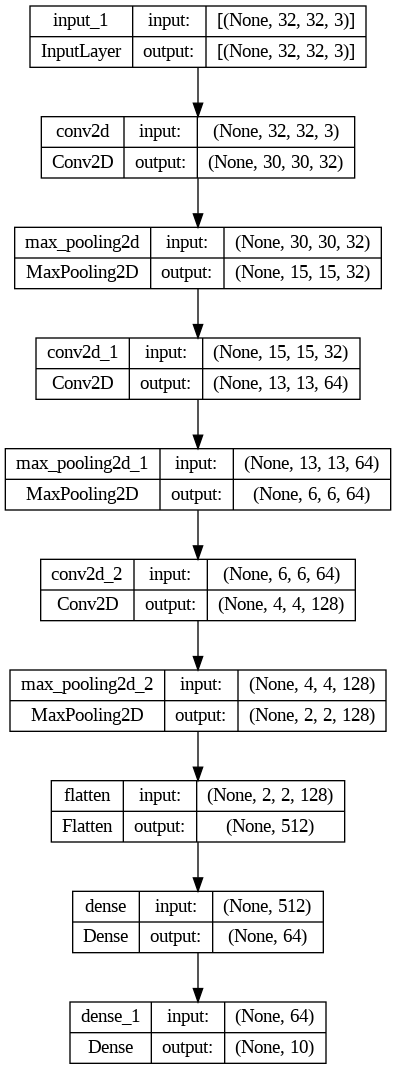

In [ ]:
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 84s 52ms/step - loss: 1.5135 - accuracy: 0.4471 - val_loss: 1.3033 - val_accuracy: 0.5323
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1463 - accuracy: 0.5935 - val_loss: 1.0978 - val_accuracy: 0.6071
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9928 - accuracy: 0.6526 - val_loss: 1.0480 - val_accuracy: 0.6384
Epoch 4/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.8920 - accuracy: 0.6888 - val_loss: 0.9293 - val_accuracy: 0.6802
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8101 - accuracy: 0.7178 - val_loss: 0.8901 - val_accuracy: 0.6971
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7478 - accuracy: 0.7396 - val_loss: 0.9358 - val_accuracy: 0.6830
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6921 - accuracy: 0.7582 - val_loss: 0.8788 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 4s 13ms/step - loss: 0.8579 - accuracy: 0.7287
Test accuracy: 0.729
